In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime


In [2]:
df=pd.read_csv("df_clean2.csv")
df.head()

,DRNumber,DateOccurred,TimeOccurred,AreaID,AreaName,CrimeCode,CrimeCodeDescription,VictimAge,VictimSex,VictimDescent,Location,NewCrimeCategory,Violent_NonViolent
0,1208575,03/11/2013,1800,12,77th Street,626,INTIMATE PARTNER - SIMPLE ASSAULT,30.0,F,W,"(33.9829, -118.3338)",ASSAULT AND BATTERY,VIOLENT
1,121801608,01/01/2013,500,18,Southeast,626,INTIMATE PARTNER - SIMPLE ASSAULT,19.0,F,H,"(33.9456, -118.2652)",ASSAULT AND BATTERY,VIOLENT
2,130100508,01/02/2013,1430,1,Central,626,INTIMATE PARTNER - SIMPLE ASSAULT,39.0,F,H,"(34.0503, -118.2504)",ASSAULT AND BATTERY,VIOLENT
3,130100518,01/05/2013,100,1,Central,626,INTIMATE PARTNER - SIMPLE ASSAULT,34.0,F,H,"(34.045, -118.264)",ASSAULT AND BATTERY,VIOLENT
4,130100521,01/05/2013,1600,1,Central,626,INTIMATE PARTNER - SIMPLE ASSAULT,50.0,F,B,"(34.0423, -118.2452)",ASSAULT AND BATTERY,VIOLENT


# code written by Mina
## Converting the type of Time Occurred to Date time

In [3]:
df["DateOccurred"]=pd.to_datetime(df["DateOccurred"])
type(df["DateOccurred"][0])

pandas._libs.tslibs.timestamps.Timestamp

## ploting some line graphes showing crime rate vs year

Text(0.5,1,'crime rate vs year of individual areas')

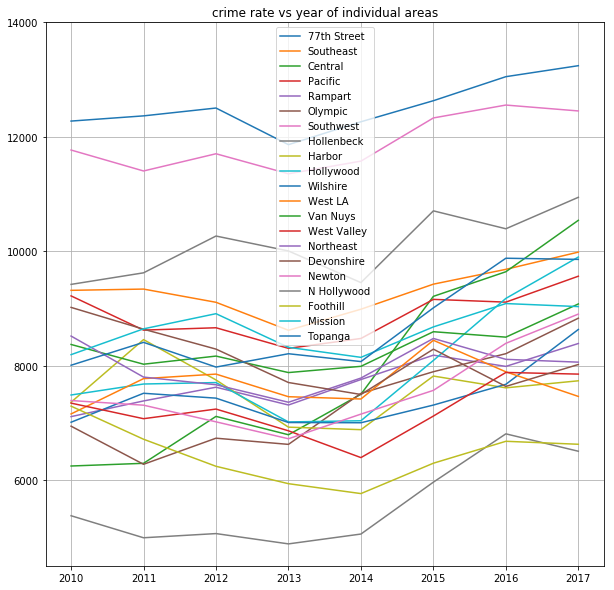

In [4]:
#import seaborn as sns
df=df.loc[df["DateOccurred"] <'2018-1-1']
plt.figure(figsize=(10,10))
AreaName=df["AreaName"].unique().tolist()
df["YearOccurred"]=df["DateOccurred"].dt.year
for Area in AreaName:
    a=df.loc[df["AreaName"] == Area]
    #print(a.columns)
    
    df_year=a.groupby("YearOccurred")["DRNumber"].count()#.sort_values(ascending=True).reset_index()
    #print(a_year.index.values, a_year['DRNumber'])
    plt.plot(df_year.index.values, df_year.values, linestyle='-',label=Area)
    plt.legend()
plt.grid()
plt.ylim(4500,14000)
plt.title("crime rate vs year of individual areas")

Text(0.5,1,'crime rate variation in the past 8 years of 7 neighborhoods ')

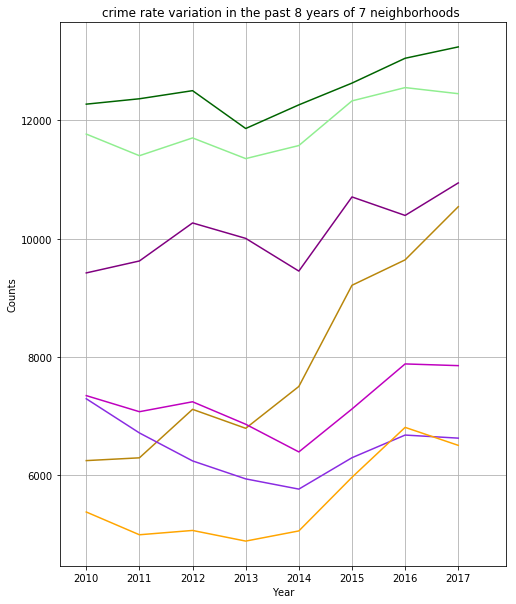

In [29]:
#import seaborn as sns

plt.figure(figsize=(8,10))
#AreaName=df["AreaName"].unique().tolist()
AreaName=['77th Street','Southwest', 'N Hollywood',"Central",'West Valley','Foothill','Hollenbeck']
i=0
color=["darkgreen","lightgreen","purple","darkgoldenrod","m","Blueviolet","orange"]
df["YearOccurred"]=df["DateOccurred"].dt.year
for Area in AreaName:
    a=df.loc[df["AreaName"] == Area]
    #print(a.columns)
    
    df_year=a.groupby("YearOccurred")["DRNumber"].count()#.sort_values(ascending=True).reset_index()
    #print(a_year.index.values, a_year['DRNumber'])
    plt.plot(df_year.index.values, df_year.values, linestyle='-',label=Area,color=color[i])
    i+=1
    #plt.legend(loc="center right")
plt.grid()
plt.xlabel("Year")
plt.xlim(2009.5,2017.9)
plt.ylabel("Counts")
plt.title("crime rate variation in the past 8 years of 7 neighborhoods ")

In [6]:
df.columns

Index(['DRNumber', 'DateOccurred', 'TimeOccurred', 'AreaID', 'AreaName',
       'CrimeCode', 'CrimeCodeDescription', 'VictimAge', 'VictimSex',
       'VictimDescent', 'Location', 'NewCrimeCategory', 'Violent_NonViolent',
       'YearOccurred'],
      dtype='object')

## Bar charts : comparing the crime rate of LA areas. Safest and most dangerous neighborhood in LA?

(0, 115000)

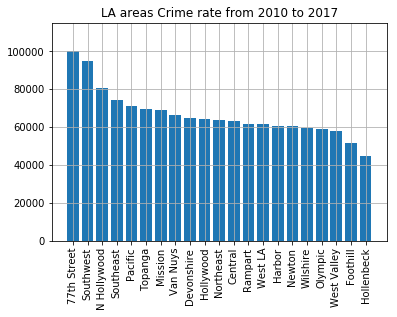

In [7]:
barchart=df.groupby("AreaName").count()
barchart=barchart.sort_values(by="NewCrimeCategory",ascending=False)
plt.bar(barchart.index,barchart.NewCrimeCategory)
plt.xticks(rotation ="vertical")
plt.grid()
plt.title("LA areas Crime rate from 2010 to 2017")
plt.ylim(0,115000)

## How much has crime rate of LA areas changed over the past 8 years?

(0, 13500)

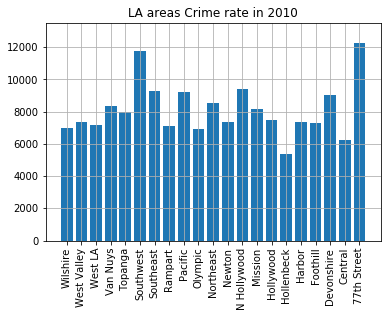

In [8]:
barchart=df.loc[df["YearOccurred"]==2010,["AreaName",'NewCrimeCategory']].groupby("AreaName").count()
barchart=barchart.sort_values(by="AreaName",ascending=False)
plt.bar(barchart.index,barchart.NewCrimeCategory)
plt.xticks(rotation ="vertical")
plt.grid()
plt.title("LA areas Crime rate in 2010")
plt.ylim(0,13500)

(0, 13500)

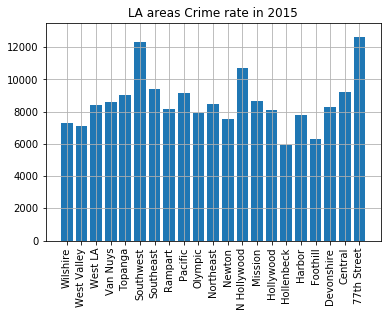

In [9]:
barchart=df.loc[df["YearOccurred"]==2015,["AreaName",'NewCrimeCategory']].groupby("AreaName").count()
barchart=barchart.sort_values(by="AreaName",ascending=False)
plt.bar(barchart.index,barchart.NewCrimeCategory)
plt.xticks(rotation ="vertical")
plt.grid()
plt.title("LA areas Crime rate in 2015")
plt.ylim(0,13500)

(0, 13500)

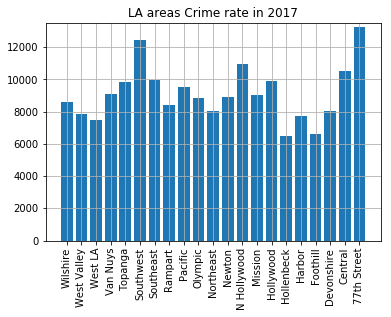

In [10]:
barchart=df.loc[df["YearOccurred"]==2017,["AreaName",'NewCrimeCategory']].groupby("AreaName").count()
barchart=barchart.sort_values(by="AreaName",ascending=False)
plt.bar(barchart.index,barchart.NewCrimeCategory)
plt.xticks(rotation ="vertical")
plt.grid()
plt.title("LA areas Crime rate in 2017")
plt.ylim(0,13500)

## Let's practice some BOXPLOT : crime rate variation of LA areas?

In [11]:
Boxplot=pd.DataFrame(df.groupby(["AreaName","YearOccurred"])["AreaID"].value_counts())

Boxplot=Boxplot.rename({"AreaID":"TotalCrime"},axis=1)
Boxplot.reset_index().head()

,AreaName,YearOccurred,AreaID,TotalCrime
0,77th Street,2010,12,12272
1,77th Street,2011,12,12363
2,77th Street,2012,12,12500
3,77th Street,2013,12,11860
4,77th Street,2014,12,12260


Text(0.5,1,'Total Crime in each Area of Los Angeles')

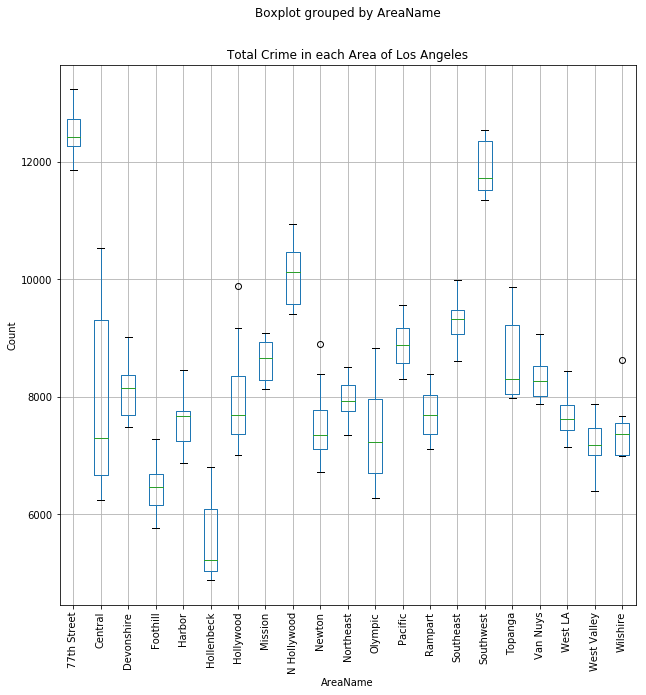

In [12]:
import scipy.stats as stats
a=Boxplot.boxplot("TotalCrime", by="AreaName", figsize=(10, 10))

plt.xticks(rotation="vertical")
plt.ylabel("Count")
plt.title("Total Crime in each Area of Los Angeles")

## 3.	Which categories have the highest rates of crime? Does it change by neighborhood?

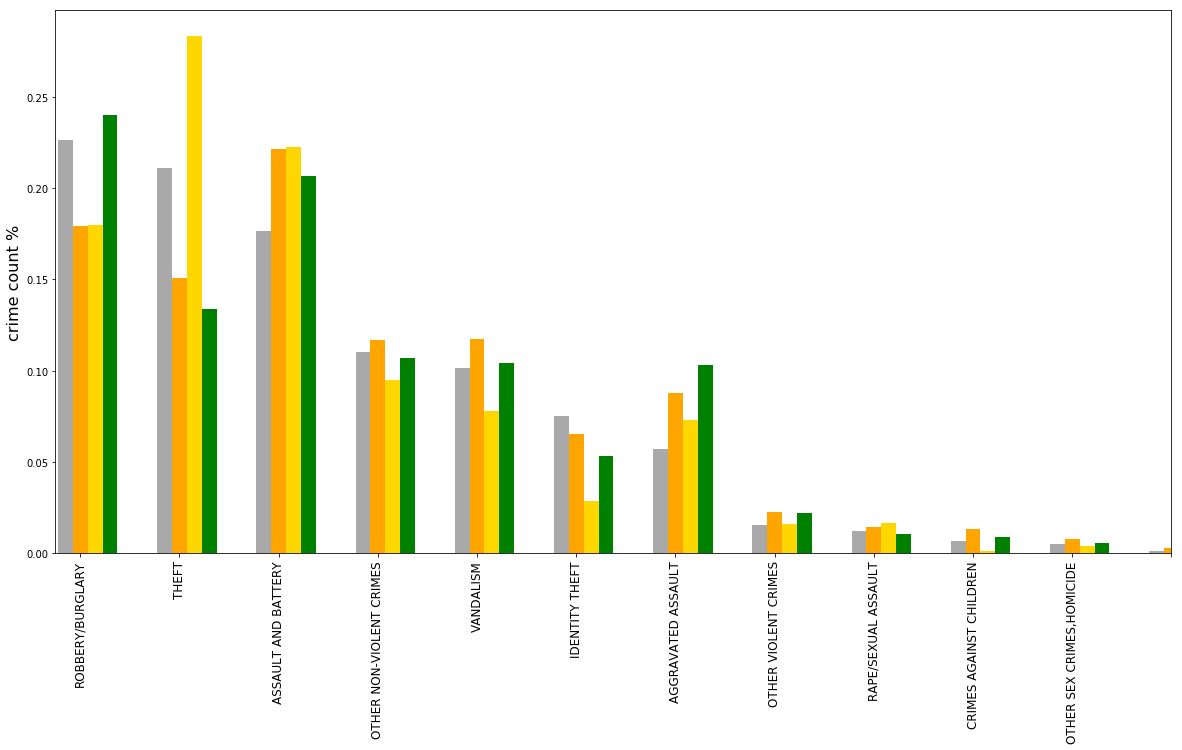

In [148]:

total=df["NewCrimeCategory"].value_counts().reset_index().sort_values(by="NewCrimeCategory",ascending=False)
total["NewCrimeCategory"]=total["NewCrimeCategory"]/total["NewCrimeCategory"].sum()

Central=pd.DataFrame(df.loc[df["AreaName"] == "Central","NewCrimeCategory"].value_counts()).reset_index().sort_values(by="index")
Central["NewCrimeCategory"]=Central["NewCrimeCategory"]/Central["NewCrimeCategory"].sum()


Hollenbeck=pd.DataFrame(df.loc[df["AreaName"] == "Hollenbeck","NewCrimeCategory"].value_counts()).reset_index().sort_values(by="index")
Hollenbeck["NewCrimeCategory"]=Hollenbeck["NewCrimeCategory"]/Hollenbeck["NewCrimeCategory"].sum()

loc_77=pd.DataFrame(df.loc[df["AreaName"] == "77th Street","NewCrimeCategory"].value_counts()).reset_index().sort_values(by="index")
loc_77["NewCrimeCategory"]=loc_77["NewCrimeCategory"]/loc_77["NewCrimeCategory"].sum()


total=total.merge(Central,on="index",how="outer",suffixes=('_t', '_c'))
total=total.merge(Hollenbeck,on="index",how="outer",suffixes=('_H'))
total=total.merge(loc_77,on="index",how="outer")

#print(total)
#print(total["index"])
N = 12
ind = np.arange(N)  # the x locations for the groups
width =.15
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
a = ax.bar(ind, total["NewCrimeCategory_t"], width, color='darkgray',label="All LA")
b = ax.bar(ind+width, total["NewCrimeCategory_x"], width, color='Orange',label="Hollenbeck")
b = ax.bar(ind+2*width, total["NewCrimeCategory_c"], width, color='gold',label="Central")
c = ax.bar(ind+3*width, total["NewCrimeCategory_y"], width, color='green',label="77th street")
#plt.legend()
plt.ylabel("crime count %",fontsize=16)
#plt.title("Comparing Crime categories for the 3 specified neighborhoods",fontsize=18)
plt.xlim(-.1,2)
ax.set_xticks(ind + width )
ax.set_xticklabels( ( "ROBBERY/BURGLARY","THEFT","ASSAULT AND BATTERY","OTHER NON-VIOLENT CRIMES","VANDALISM",
                     "IDENTITY THEFT","AGGRAVATED ASSAULT","OTHER VIOLENT CRIMES","RAPE/SEXUAL ASSAULT",
                     "CRIMES AGAINST CHILDREN","OTHER SEX CRIMES,HOMICIDE") )
plt.xticks(rotation="vertical")
plt.rc('xtick', labelsize=12)


## 5.	Are there different trends between violent and non-violent crimes?

In [146]:
total=df["Violent_NonViolent"].value_counts().reset_index()
total["Violent_NonViolent"]=total["Violent_NonViolent"]/total["Violent_NonViolent"].sum()
print(total)

Central=pd.DataFrame(df.loc[df["AreaName"] == "Central","Violent_NonViolent"].value_counts()).reset_index()
Central["Violent_NonViolent"]=Central["Violent_NonViolent"]/Central["Violent_NonViolent"].sum()

Southwest=pd.DataFrame(df.loc[df["AreaName"] == "Southwest","Violent_NonViolent"].value_counts()).reset_index()

loc_77=pd.DataFrame(df.loc[df["AreaName"] == "77th Street","Violent_NonViolent"].value_counts()).reset_index()
loc_77["Violent_NonViolent"]=loc_77["Violent_NonViolent"]/loc_77["Violent_NonViolent"].sum()
type(loc_77)

Hollenbeck=pd.DataFrame(df.loc[df["AreaName"] == "Hollenbeck","Violent_NonViolent"].value_counts()).reset_index()
Hollenbeck["Violent_NonViolent"]=Hollenbeck["Violent_NonViolent"]/Hollenbeck["Violent_NonViolent"].sum()


         index  Violent_NonViolent
0  NON-VIOLENT            0.503486
1      VIOLENT            0.496514


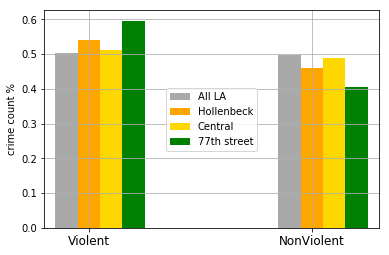

In [145]:
N = 2
ind = np.arange(N)  # the x locations for the groups
width =.1
fig = plt.figure()
ax = fig.add_subplot(111)
a = ax.bar(ind, total["Violent_NonViolent"], width, color='darkgray',label="All LA")
b = ax.bar(ind+width, Hollenbeck["Violent_NonViolent"], width, color='Orange',label="Hollenbeck")
b = ax.bar(ind+2*width, Central["Violent_NonViolent"], width, color='gold',label="Central")
c = ax.bar(ind+3*width, loc_77["Violent_NonViolent"], width, color='green',label="77th street")
plt.legend(loc="center")
plt.ylabel("crime count %")
#plt.title("Violent vs. Nonviolent crimes in LA neighborhoods")
plt.xlim(-.1,1.4)
ax.set_xticks(ind + width )
ax.set_xticklabels( ('Violent', 'NonViolent', 'G3', 'G4', 'G5') )
plt.grid()

In [16]:
df.head()


,DRNumber,DateOccurred,TimeOccurred,AreaID,AreaName,CrimeCode,CrimeCodeDescription,VictimAge,VictimSex,VictimDescent,Location,NewCrimeCategory,Violent_NonViolent,YearOccurred
0,1208575,2013-03-11,1800,12,77th Street,626,INTIMATE PARTNER - SIMPLE ASSAULT,30.0,F,W,"(33.9829, -118.3338)",ASSAULT AND BATTERY,VIOLENT,2013
1,121801608,2013-01-01,500,18,Southeast,626,INTIMATE PARTNER - SIMPLE ASSAULT,19.0,F,H,"(33.9456, -118.2652)",ASSAULT AND BATTERY,VIOLENT,2013
2,130100508,2013-01-02,1430,1,Central,626,INTIMATE PARTNER - SIMPLE ASSAULT,39.0,F,H,"(34.0503, -118.2504)",ASSAULT AND BATTERY,VIOLENT,2013
3,130100518,2013-01-05,100,1,Central,626,INTIMATE PARTNER - SIMPLE ASSAULT,34.0,F,H,"(34.045, -118.264)",ASSAULT AND BATTERY,VIOLENT,2013
4,130100521,2013-01-05,1600,1,Central,626,INTIMATE PARTNER - SIMPLE ASSAULT,50.0,F,B,"(34.0423, -118.2452)",ASSAULT AND BATTERY,VIOLENT,2013


In [17]:
print(df["VictimDescent"].unique())
df.groupby("VictimDescent")["DRNumber"].count().sort_values(ascending=False)

['W' 'H' 'B' 'A' 'O' 'K' 'F' 'J' 'X' 'P' 'I' 'V' 'Z' 'S' 'D' 'G' 'C' 'L'
 'U' '-']


VictimDescent
H    553764
W    380218
B    260463
O    137946
A     38405
X     17459
K      6996
F      1933
I       693
C       632
P       281
J       242
U       120
V        87
G        62
Z        53
S        24
D        12
L         9
-         1
Name: DRNumber, dtype: int64

Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian

### Summary data on ethnicity and victimization : are all the ethnic groups equally likely victim?

In [18]:
df_Descent=pd.DataFrame(df.groupby("VictimDescent")["NewCrimeCategory"].value_counts())

df_Descent=df_Descent.rename({"NewCrimeCategory":"Counts"},axis=1).reset_index()
print()
for i in range(0,len(df_Descent["VictimDescent"])):
    if (df_Descent['VictimDescent'][i] != "H" ) & (df_Descent['VictimDescent'][i] != "W" ) & (df_Descent['VictimDescent'][i] != "B") & (df_Descent['VictimDescent'][i] != "A" ) :
        df_Descent.iloc[i, df_Descent.columns.get_loc('VictimDescent')] = "other"
        
df_Descent.head(5)       

,VictimDescent,NewCrimeCategory,Counts
0,other,OTHER VIOLENT CRIMES,1
1,A,ROBBERY/BURGLARY,11932
2,A,THEFT,10481
3,A,ASSAULT AND BATTERY,4246
4,A,IDENTITY THEFT,3607


               Counts
VictimDescent        
A               38405
B              260463
H              553764
W              380218
other          166550
Index(['A', 'B', 'H', 'W', 'other'], dtype='object', name='VictimDescent')
               Counts   percent
VictimDescent                  
A               38405  0.027444
B              260463  0.186125
H              553764  0.395715
W              380218  0.271701
other          166550  0.119015

9.487729036781154


Power_divergenceResult(statistic=98.01693115446476, pvalue=2.5997845736072107e-20)

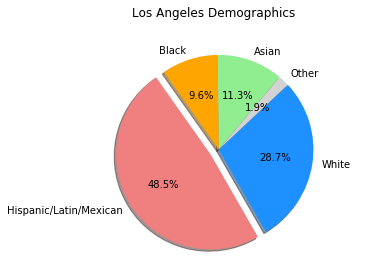

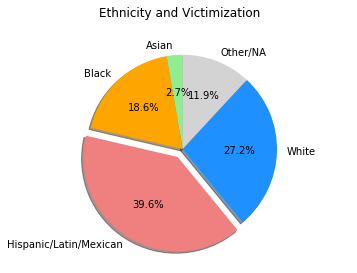

In [19]:
racial_composition=pd.DataFrame({"race":["Asian","Black","Hispanic/Latin/Mexican","White","Other"],
                               "population":[11.3,9.6,48.5,28.7,1.9]})
plt.figure()
plt.pie(racial_composition["population"],autopct='%1.1f%%',startangle=50,shadow=True,
       labels=["Asian","Black","Hispanic/Latin/Mexican","White","Other"], explode=(0,0, 0.1, 0,0),
       colors=["lightgreen","orange","lightcoral","dodgerblue","lightgray"])
plt.title("Los Angeles Demographics",position=(0.5, 1.1))
df_Descent_total=pd.DataFrame(df_Descent.groupby("VictimDescent")["Counts"].sum())

print(df_Descent_total)
print(df_Descent_total.index)
df_Descent_total["percent"]=df_Descent_total["Counts"]/df_Descent_total["Counts"].sum()
print(df_Descent_total)
print()
plt.axis("equal")
plt.figure()
plt.pie(df_Descent_total["Counts"],labels=["Asian","Black","Hispanic/Latin/Mexican","White","Other/NA"],autopct='%1.1f%%',
      startangle=90, explode=(0,0, 0.1, 0,0),shadow=True,
       colors=["lightgreen","orange","lightcoral","dodgerblue","lightgray"])
plt.axis("equal")
plt.title("Ethnicity and Victimization",position=(0.5, 1.1))

import scipy.stats as stats

critical_value = stats.chi2.ppf(q = 0.95, df = 4)
print(critical_value)
stats.chisquare(df_Descent_total["percent"], racial_composition["population"])


<Figure size 432x288 with 0 Axes>

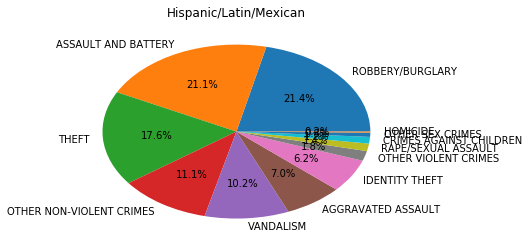

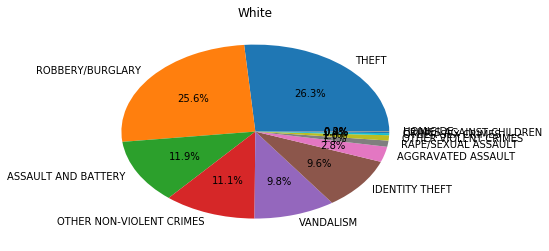

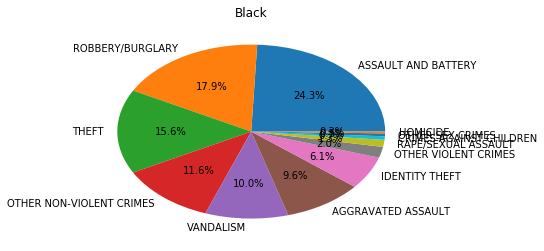

<Figure size 432x288 with 0 Axes>

In [20]:

#df_Descent=df.groupby("VictimDescent").count()
#df_Descent=df_Descent.sort_values(by="DRNumber", ascending=False).reset_index()

df_Descent_H=df_Descent.loc[df_Descent["VictimDescent"] == "H"]
plt.pie(df_Descent_H["Counts"],labels=(df_Descent_H["NewCrimeCategory"]),autopct='%1.1f%%')
plt.title("Hispanic/Latin/Mexican")
plt.figure()

df_Descent_W=df_Descent.loc[df_Descent["VictimDescent"] == "W"]
plt.pie(df_Descent_W["Counts"],labels=(df_Descent_W["NewCrimeCategory"]),autopct='%1.1f%%')
plt.title("White")
plt.figure()

df_Descent_B=df_Descent.loc[df_Descent["VictimDescent"] == "B"]
plt.pie(df_Descent_B["Counts"],labels=(df_Descent_B["NewCrimeCategory"]),autopct='%1.1f%%')
plt.title("Black")
plt.figure()

#df_Descent_other=df_Descent.loc[df_Descent["VictimDescent"] == "other"]
#plt.pie(df_Descent_other["Counts"],labels=(df_Descent_other["NewCrimeCategory"]),autopct='%1.1f%%')
#plt.title("other")

<Figure size 432x288 with 0 Axes>

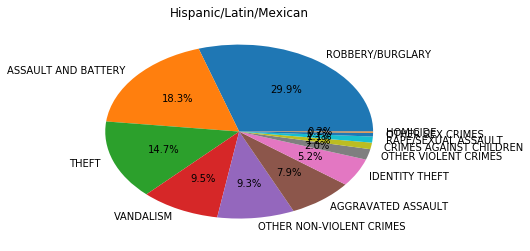

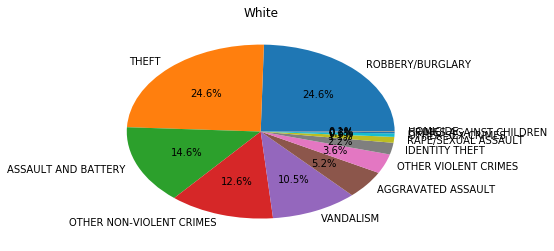

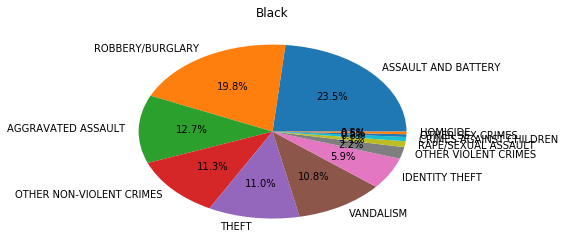

<Figure size 432x288 with 0 Axes>

In [21]:
loc_77=df.loc[df["AreaName"] == "77th Street"]
df_Descent=pd.DataFrame(loc_77.groupby("VictimDescent")["NewCrimeCategory"].value_counts())
df_Descent=df_Descent.rename({"NewCrimeCategory":"Counts"},axis=1).reset_index()

for i in range(0,len(df_Descent["VictimDescent"])):
    if (df_Descent['VictimDescent'][i] != "H" ) & (df_Descent['VictimDescent'][i] != "W" ) & (df_Descent['VictimDescent'][i] != "B" ):
        df_Descent.iloc[i, df_Descent.columns.get_loc('VictimDescent')] = "other"
#df_Descent=df.groupby("VictimDescent").count()
#df_Descent=df_Descent.sort_values(by="DRNumber", ascending=False).reset_index()

df_Descent_H=df_Descent.loc[df_Descent["VictimDescent"] == "H"]
plt.pie(df_Descent_H["Counts"],labels=(df_Descent_H["NewCrimeCategory"]),autopct='%1.1f%%')
plt.title("Hispanic/Latin/Mexican")
plt.figure()

df_Descent_W=df_Descent.loc[df_Descent["VictimDescent"] == "W"]
plt.pie(df_Descent_W["Counts"],labels=(df_Descent_W["NewCrimeCategory"]),autopct='%1.1f%%')
plt.title("White")
plt.figure()

df_Descent_B=df_Descent.loc[df_Descent["VictimDescent"] == "B"]
plt.pie(df_Descent_B["Counts"],labels=(df_Descent_B["NewCrimeCategory"]),autopct='%1.1f%%')
plt.title("Black")
plt.figure()

#df_Descent_other=df_Descent.loc[df_Descent["VictimDescent"] == "other"]
#plt.pie(df_Descent_other["Counts"],labels=(df_Descent_other["NewCrimeCategory"]),autopct='%1.1f%%')
#plt.title("other")

<Figure size 432x288 with 0 Axes>

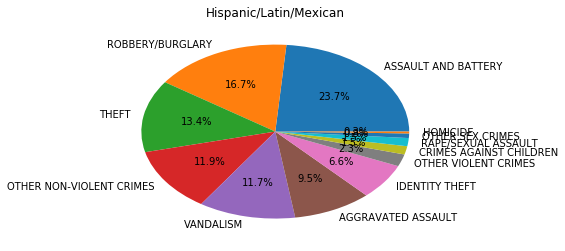

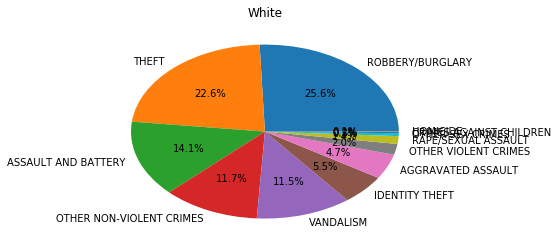

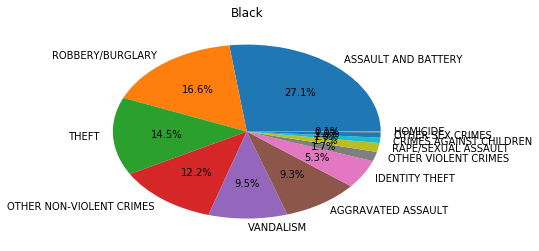

<Figure size 432x288 with 0 Axes>

In [22]:
Hollenbeck=df.loc[df["AreaName"] == "Hollenbeck"]
df_Descent=pd.DataFrame(Hollenbeck.groupby("VictimDescent")["NewCrimeCategory"].value_counts())
df_Descent=df_Descent.rename({"NewCrimeCategory":"Counts"},axis=1).reset_index()

for i in range(0,len(df_Descent["VictimDescent"])):
    if (df_Descent['VictimDescent'][i] != "H" ) & (df_Descent['VictimDescent'][i] != "W" ) & (df_Descent['VictimDescent'][i] != "B" ):
        df_Descent.iloc[i, df_Descent.columns.get_loc('VictimDescent')] = "other"
#df_Descent=df.groupby("VictimDescent").count()
#df_Descent=df_Descent.sort_values(by="DRNumber", ascending=False).reset_index()

df_Descent_H=df_Descent.loc[df_Descent["VictimDescent"] == "H"]
plt.pie(df_Descent_H["Counts"],labels=(df_Descent_H["NewCrimeCategory"]),autopct='%1.1f%%')
plt.title("Hispanic/Latin/Mexican")
plt.figure()

df_Descent_W=df_Descent.loc[df_Descent["VictimDescent"] == "W"]
plt.pie(df_Descent_W["Counts"],labels=(df_Descent_W["NewCrimeCategory"]),autopct='%1.1f%%')
plt.title("White")
plt.figure()

df_Descent_B=df_Descent.loc[df_Descent["VictimDescent"] == "B"]
plt.pie(df_Descent_B["Counts"],labels=(df_Descent_B["NewCrimeCategory"]),autopct='%1.1f%%')
plt.title("Black")
plt.figure()

#df_Descent_other=df_Descent.loc[df_Descent["VictimDescent"] == "other"]
#plt.pie(df_Descent_other["Counts"],labels=(df_Descent_other["NewCrimeCategory"]),autopct='%1.1f%%')
#plt.title("other")

<Figure size 432x288 with 0 Axes>

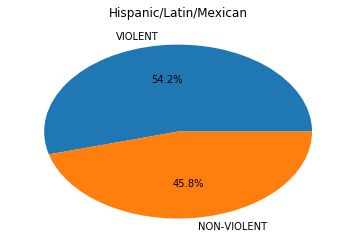

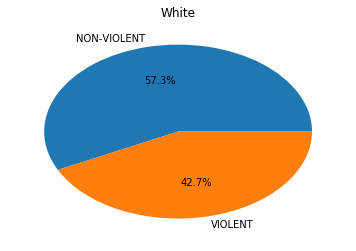

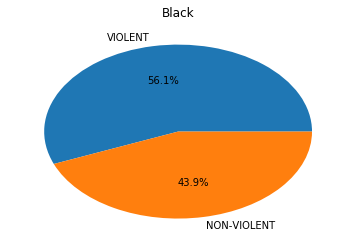

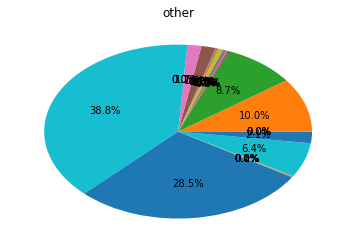

<Figure size 432x288 with 0 Axes>

In [23]:
df_Descent=pd.DataFrame(df.groupby("VictimDescent")["Violent_NonViolent"].value_counts())
df_Descent=df_Descent.rename({"Violent_NonViolent":"Counts"},axis=1).reset_index()

for i in range(0,len(df_Descent["VictimDescent"])):
    if (df_Descent['VictimDescent'][i] != "H" ) & (df_Descent['VictimDescent'][i] != "W" ) & (df_Descent['VictimDescent'][i] != "B" ):
        df_Descent.iloc[i, df_Descent.columns.get_loc('VictimDescent')] = "other"
#df_Descent=df.groupby("VictimDescent").count()
#df_Descent=df_Descent.sort_values(by="DRNumber", ascending=False).reset_index()

df_Descent_H=df_Descent.loc[df_Descent["VictimDescent"] == "H"]
plt.pie(df_Descent_H["Counts"],labels=(df_Descent_H["Violent_NonViolent"]),autopct='%1.1f%%')
plt.title("Hispanic/Latin/Mexican")
plt.figure()

df_Descent_W=df_Descent.loc[df_Descent["VictimDescent"] == "W"]
plt.pie(df_Descent_W["Counts"],labels=(df_Descent_W["Violent_NonViolent"]),autopct='%1.1f%%')
plt.title("White")
plt.figure()

df_Descent_B=df_Descent.loc[df_Descent["VictimDescent"] == "B"]
plt.pie(df_Descent_B["Counts"],labels=(df_Descent_B["Violent_NonViolent"]),autopct='%1.1f%%')
plt.title("Black")
plt.figure()

df_Descent_other=df_Descent.loc[df_Descent["VictimDescent"] == "other"]
plt.pie(df_Descent_other["Counts"],autopct='%1.1f%%')
plt.title("other")
plt.figure()

In [24]:
df_Descent['VictimDescent'][0]

'other'

Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian 
              H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese 
              K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian 
              V - Vietnamese W - White X - Unknown Z - Asian Indian

#  code written by Davinder
#  Crime Rate per Year(2010-2017) 

In [152]:
date_grouped=df.groupby(df.DateOccurred.dt.year)["DRNumber"].count()
date_grouped_df=pd.DataFrame(date_grouped)
date_grouped_df=date_grouped_df.reset_index()
date_grouped_df=date_grouped_df.drop([8])
plt.plot(date_grouped_df.DateOccurred,date_grouped_df.DRNumber)

KeyError: '[8] not found in axis'

# Crime Rate per Month/Year

# 2010

           DateOccurred
January           15831
February          13008
March             14706
April             14412
May               14563
June              14453
July              14717
August            14215
September         13529
October           14378
November          13021
December          13942
           DateOccurred
January      510.677419
February     464.571429
March        474.387097
April        480.400000
May          469.774194
June         481.766667
July         474.741935
August       458.548387
September    450.966667
October      463.806452
November     434.033333
December     449.741935


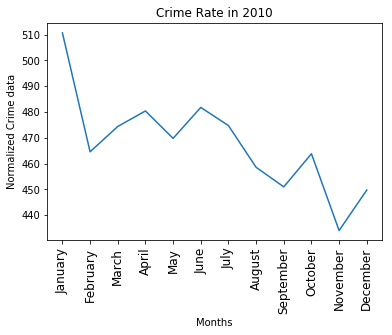

In [155]:
days=[31,28,31,30,31,30,31,31,30,31,30,31]
df_year_2010= df[df.DateOccurred.dt.year == 2010]
month_2010 = df_year_2010.groupby(pd.Grouper(key='DateOccurred', freq='M'))["DateOccurred"].count() # groupby each 1 
month_2010.index = month_2010.index.strftime('%B')
month_2010_df=pd.DataFrame(month_2010)
print(month_2010_df)
month_2010_df['DateOccurred']=(month_2010_df['DateOccurred']/days)
print(month_2010_df)
plt.plot(month_2010_df.index,month_2010_df["DateOccurred"])
plt.xticks(rotation="vertical")
plt.title("Crime Rate in 2010")
plt.xlabel("Months")
plt.ylabel("Normalized Crime data")
#plt.savefig(f"images/year2010.png")
plt.show()


#  2011

           DateOccurred
January           15216
February          12444
March             14410
April             13954
May               14323
June              14371
July              14686
August            14532
September         13833
October           14543
November          13830
December          14140
           DateOccurred
January      490.838710
February     444.428571
March        464.838710
April        465.133333
May          462.032258
June         479.033333
July         473.741935
August       468.774194
September    461.100000
October      469.129032
November     461.000000
December     456.129032


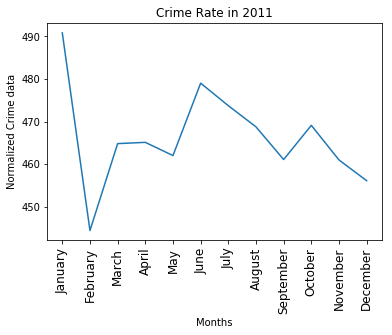

In [154]:
days=[31,28,31,30,31,30,31,31,30,31,30,31]
df_year_2011= df[df.DateOccurred.dt.year == 2011]
month_2011 = df_year_2011.groupby(pd.Grouper(key='DateOccurred', freq='M'))["DateOccurred"].count() # groupby each 1 
month_2011.index = month_2011.index.strftime('%B')
month_2011_df=pd.DataFrame(month_2011)
print(month_2011_df)
month_2011_df['DateOccurred']=(month_2011_df['DateOccurred']/days)
print(month_2011_df)
plt.plot(month_2011_df.index,month_2011_df["DateOccurred"])
plt.xticks(rotation="vertical")
plt.title("Crime Rate in 2011")
plt.xlabel("Months")
plt.ylabel("Normalized Crime data")
#plt.savefig(f"images/year2011.png")
plt.show()


# 2012

           DateOccurred
January           15019
February          13054
March             14157
April             13914
May               14920
June              14454
July              14405
August            15042
September         14472
October           14587
November          13254
December          13695
           DateOccurred
January      484.483871
February     466.214286
March        456.677419
April        463.800000
May          481.290323
June         481.800000
July         464.677419
August       485.225806
September    482.400000
October      470.548387
November     441.800000
December     441.774194


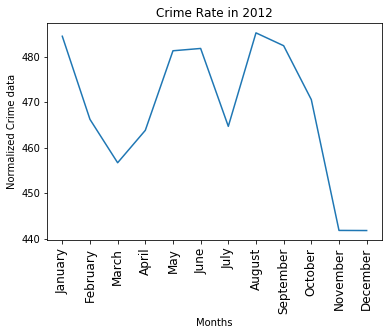

In [157]:
days=[31,28,31,30,31,30,31,31,30,31,30,31]
df_year_2012= df[df.DateOccurred.dt.year == 2012]
month_2012 = df_year_2012.groupby(pd.Grouper(key='DateOccurred', freq='M'))["DateOccurred"].count() # groupby each 1 
month_2012.index = month_2012.index.strftime('%B')
month_2012_df=pd.DataFrame(month_2012)
print(month_2012_df)
month_2012_df['DateOccurred']=(month_2012_df['DateOccurred']/days)
print(month_2012_df)
plt.plot(month_2012_df.index,month_2012_df["DateOccurred"])
plt.xticks(rotation="vertical")
plt.title("Crime Rate in 2012")
plt.xlabel("Months")
plt.ylabel("Normalized Crime data")
#plt.savefig(f"images/year2012.png")
plt.show()


# 2013

           DateOccurred
January           13972
February          11766
March             13716
April             13456
May               14317
June              13681
July              14101
August            14795
September         13726
October           13654
November          13006
December          12916
           DateOccurred
January      450.709677
February     420.214286
March        442.451613
April        448.533333
May          461.838710
June         456.033333
July         454.870968
August       477.258065
September    457.533333
October      440.451613
November     433.533333
December     416.645161


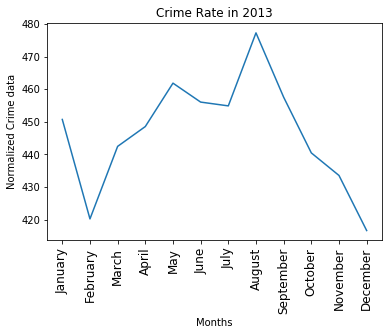

In [158]:
days=[31,28,31,30,31,30,31,31,30,31,30,31]
df_year_2013= df[df.DateOccurred.dt.year == 2013]
month_2013 = df_year_2013.groupby(pd.Grouper(key='DateOccurred', freq='M'))["DateOccurred"].count() # groupby each 1 
month_2013.index = month_2013.index.strftime('%B')
month_2013_df=pd.DataFrame(month_2013)
print(month_2013_df)
month_2013_df['DateOccurred']=(month_2013_df['DateOccurred']/days)
print(month_2013_df)
plt.plot(month_2013_df.index,month_2013_df["DateOccurred"])
plt.xticks(rotation="vertical")
plt.title("Crime Rate in 2013")
plt.xlabel("Months")
plt.ylabel("Normalized Crime data")
#plt.savefig(f"images/year2013.png")
plt.show()


# 2014

           DateOccurred
January           13593
February          11567
March             13297
April             13157
May               14305
June              13883
July              14756
August            14590
September         14273
October           14581
November          13338
December          14325
           DateOccurred
January      438.483871
February     413.107143
March        428.935484
April        438.566667
May          461.451613
June         462.766667
July         476.000000
August       470.645161
September    475.766667
October      470.354839
November     444.600000
December     462.096774


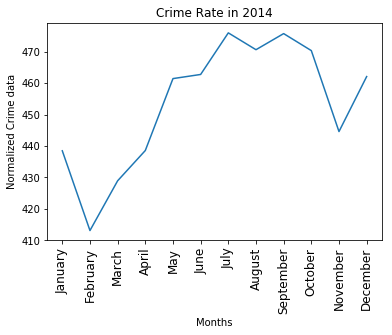

In [159]:
days=[31,28,31,30,31,30,31,31,30,31,30,31]
df_year_2014= df[df.DateOccurred.dt.year == 2014]
month_2014 = df_year_2014.groupby(pd.Grouper(key='DateOccurred', freq='M'))["DateOccurred"].count() # groupby each 1 
month_2014.index = month_2014.index.strftime('%B')
month_2014_df=pd.DataFrame(month_2014)
print(month_2014_df)
month_2014_df['DateOccurred']=(month_2014_df['DateOccurred']/days)
print(month_2014_df)
plt.plot(month_2014_df.index,month_2014_df["DateOccurred"])
plt.xticks(rotation="vertical")
plt.title("Crime Rate in 2014")
plt.xlabel("Months")
plt.ylabel("Normalized Crime data")
#plt.savefig(f"images/year2014.png")
plt.show()


# 2015

           DateOccurred
January           15372
February          13435
March             15276
April             14496
May               15160
June              15035
July              15773
August            15964
September         15374
October           16007
November          14335
December          14917
           DateOccurred
January      495.870968
February     479.821429
March        492.774194
April        483.200000
May          489.032258
June         501.166667
July         508.806452
August       514.967742
September    512.466667
October      516.354839
November     477.833333
December     481.193548


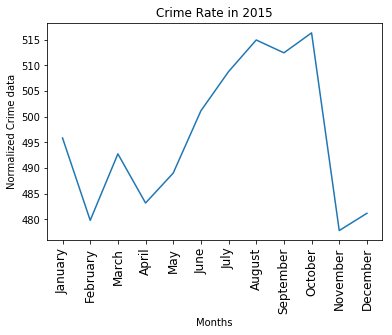

In [160]:
days=[31,28,31,30,31,30,31,31,30,31,30,31]
df_year_2015= df[df.DateOccurred.dt.year == 2015]
month_2015 = df_year_2015.groupby(pd.Grouper(key='DateOccurred', freq='M'))["DateOccurred"].count() # groupby each 1 
month_2015.index = month_2015.index.strftime('%B')
month_2015_df=pd.DataFrame(month_2015)
print(month_2015_df)
month_2015_df['DateOccurred']=(month_2015_df['DateOccurred']/days)
print(month_2015_df)
plt.plot(month_2015_df.index,month_2015_df["DateOccurred"])
plt.xticks(rotation="vertical")
plt.title("Crime Rate in 2015")
plt.xlabel("Months")
plt.ylabel("Normalized Crime data")
#plt.savefig(f"images/year2015.png")
plt.show()


# 2016

           DateOccurred
January           15304
February          14415
March             15154
April             15408
May               15690
June              15758
July              16251
August            16018
September         15338
October           16197
November          14703
December          15665
           DateOccurred
January      493.677419
February     514.821429
March        488.838710
April        513.600000
May          506.129032
June         525.266667
July         524.225806
August       516.709677
September    511.266667
October      522.483871
November     490.100000
December     505.322581


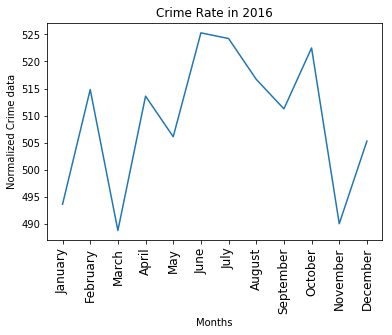

In [161]:
days=[31,28,31,30,31,30,31,31,30,31,30,31]
df_year_2016= df[df.DateOccurred.dt.year == 2016]
month_2016 = df_year_2016.groupby(pd.Grouper(key='DateOccurred', freq='M'))["DateOccurred"].count() # groupby each 1 
month_2016.index = month_2016.index.strftime('%B')
month_2016_df=pd.DataFrame(month_2016)
print(month_2016_df)
month_2016_df['DateOccurred']=(month_2016_df['DateOccurred']/days)
print(month_2016_df)
plt.plot(month_2016_df.index,month_2016_df["DateOccurred"])
plt.xticks(rotation="vertical")
plt.title("Crime Rate in 2016")
plt.xlabel("Months")
plt.ylabel("Normalized Crime data")
#plt.savefig(f"images/year2016.png")
plt.show()


# 2017

           DateOccurred
January           15772
February          14056
March             16034
April             15517
May               16013
June              15770
July              16860
August            16596
September         16377
October           17055
November          15676
December          15828
           DateOccurred
January      508.774194
February     502.000000
March        517.225806
April        517.233333
May          516.548387
June         525.666667
July         543.870968
August       535.354839
September    545.900000
October      550.161290
November     522.533333
December     510.580645


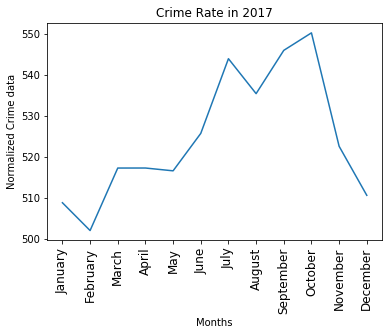

In [162]:
days=[31,28,31,30,31,30,31,31,30,31,30,31]
df_year_2017= df[df.DateOccurred.dt.year == 2017]
month_2017 = df_year_2017.groupby(pd.Grouper(key='DateOccurred', freq='M'))["DateOccurred"].count() # groupby each 1 
month_2017.index = month_2017.index.strftime('%B')
month_2017_df=pd.DataFrame(month_2017)
print(month_2017_df)
month_2017_df['DateOccurred']=(month_2017_df['DateOccurred']/days)
print(month_2017_df)
plt.plot(month_2017_df.index,month_2017_df["DateOccurred"])
plt.xticks(rotation="vertical")
plt.title("Crime Rate in 2017")
plt.xlabel("Months")
plt.ylabel("Normalized Crime data")
#plt.savefig(f"images/year2017.png")
plt.show()


In [ ]:
# or we can also use for loop for all years:
for year in range(2010,2018):
    days=[31,28,31,30,31,30,31,31,30,31,30,31]
    df_year= df[df.DateOccurred.dt.year == year]
    month = df_year.groupby(pd.Grouper(key='DateOccurred', freq='M'))["DateOccurred"].count() # groupby each 1 
    month.index = month.index.strftime('%B')
    month_df=pd.DataFrame(month)
    print(month_df)
    month_df['DateOccurred']=(month_df['DateOccurred']/days)
    print(month_df)
    plt.plot(month_df.index,month_df["DateOccurred"],label=year)
    plt.legend()
    plt.xticks(rotation="vertical")
    plt.title(f"Crime Rate ")
    plt.xlabel("Months")
    plt.ylabel("Normalized Crime data")
    #plt.savefig(f"images/year{year}.png",bbox_inches="tight")
    

# Day/Night (Time Crime Occurred) Analysis

### 12Hour time difference [  Day time(6am-6pm) & Night time(6pm-6am)  ]
                       

In [163]:
df_daytime=df.loc[(df["TimeOccurred"]>=600) & (df["TimeOccurred"]<=1800) ]
df_nighttime=df.loc[(((df["TimeOccurred"]>1800) & (df["TimeOccurred"]<=2400))| ((df["TimeOccurred"]>=0) & (df["TimeOccurred"]<600)))]
dic={"time":["Day time(6am-6pm)","Night time(6pm-6am)"],"count": [df_daytime.TimeOccurred.count(),df_nighttime.TimeOccurred.count()]}
time_df=pd.DataFrame(dic,columns=['time','count'])
time_df

,time,count
0,Day time(6am-6pm),803023
1,Night time(6pm-6am),596377


### 4hour Time Differnce 

Text(0,0.5,'Total number of crimes')

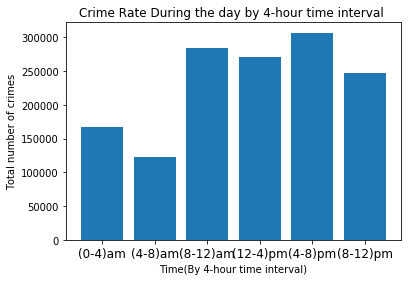

In [164]:
bin4=[0,400,800,1200,1600,2000,2400]
df['time_bin4']=pd.cut(df['TimeOccurred'],bin4)
time_bin4=df.groupby("time_bin4")
time4=time_bin4["TimeOccurred"].count()
time4_df=pd.DataFrame(time4)
time4_df=time4_df.reset_index()
label=['(0-4)am','(4-8)am','(8-12)am','(12-4)pm','(4-8)pm','(8-12)pm']
plt.bar(range(len(time4_df.time_bin4)),time4_df.TimeOccurred)
tick_locations=[value for value in range(len(time4_df.time_bin4))]
plt.xticks(tick_locations,label)
plt.title("Crime Rate During the day by 4-hour time interval ")
plt.xlabel("Time(By 4-hour time interval)")
plt.ylabel("Total number of crimes")
#plt.savefig("images/timeby4.png",bbox_inches="tight")

### 2hour Time Differnce 

Text(0,0.5,'Total number of crimes')

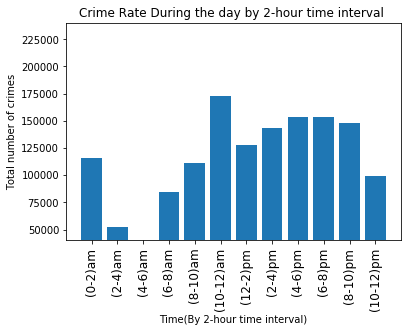

In [165]:
bin2=[0,200,400,600,800,1000,1200,1400,1600,1800,2000,2200,2400]
df['time_bin2']=pd.cut(df['TimeOccurred'],bin2)
time_bin2=df.groupby("time_bin2")
time2=time_bin2["TimeOccurred"].count()
time2_df=pd.DataFrame(time2)
time2_df=time2_df.reset_index()
label=['(0-2)am','(2-4)am','(4-6)am','(6-8)am','(8-10)am','(10-12)am','(12-2)pm','(2-4)pm','(4-6)pm','(6-8)pm','(8-10)pm','(10-12)pm']
plt.bar(range(len(time2_df.time_bin2)),time2_df.TimeOccurred)
tick_locations=[value for value in range(len(time2_df.time_bin2))]
plt.xticks(tick_locations,label,rotation='vertical')
plt.ylim(40000,240000)
plt.title("Crime Rate During the day by 2-hour time interval ")
plt.xlabel("Time(By 2-hour time interval)")
plt.ylabel("Total number of crimes")
#plt.savefig("images/timeby2.png",bbox_inches="tight")

# Type of Crime Occur Between peak hours(10-12am)

In [ ]:
df_time1012=df.loc[(df["TimeOccurred"]>=1000) & (df["TimeOccurred"]<=1200) ]
group1012=df_time1012.groupby("NewCrimeCategory")
crime1012=group1012.NewCrimeCategory.count()
crime1012_df=pd.DataFrame(crime1012)
crime1012_df=crime1012_df.rename(columns={"NewCrimeCategory":"total"})
crime1012_df=crime1012_df.reset_index()
crime1012_df
plt.pie(crime1012_df.total,labels=crime1012_df.NewCrimeCategory,autopct='%1.1f%%',startangle=140)
plt.axis('equal')
plt.title("Crime occurs between peak hours (10-12am)")
plt.savefig("images/crime10-12_pie.png")

In [ ]:
plt.bar(crime1012_df.NewCrimeCategory,crime1012_df.total)
plt.xticks(rotation="vertical")
plt.title("Crime occurs between peak hours (10-12am)")
plt.xlabel("Crime type")
plt.ylabel("Number of crimes")
plt.savefig("images/crime10-12.png",bbox_inches="tight")

In [ ]:
groupdaytime=df_daytime.groupby("NewCrimeCategory")
crimedaytime=groupdaytime.NewCrimeCategory.count()
crimedaytime_df=pd.DataFrame(crimedaytime)
crimedaytime_df=crimedaytime_df.rename(columns={"NewCrimeCategory":"total"})
crimedaytime_df=crimedaytime_df.reset_index()
crimedaytime_df
plt.pie(crimedaytime_df.total,labels=crimedaytime_df.NewCrimeCategory,autopct='%1.1f%%',startangle=140)
plt.axis('equal')
plt.title("During Daytime Crime Rate")
plt.savefig("images/daytimecrime_pie.png")

In [ ]:
plt.bar(crimedaytime_df.NewCrimeCategory,crimedaytime_df.total)
plt.ylim(20000,240000)
plt.xticks(rotation="vertical")
plt.title("During Daytime Crime Rate")
plt.xlabel("Crime type")
plt.ylabel("Number of crimes")
plt.savefig("images/daytimecrime.png",bbox_inches="tight")

In [ ]:
groupNT=df_nighttime.groupby("NewCrimeCategory")
crimeNT=groupNT.NewCrimeCategory.count()
crimeNT_df=pd.DataFrame(crimeNT)
crimeNT_df=crimeNT_df.rename(columns={"NewCrimeCategory":"total"})
crimeNT_df=crimeNT_df.reset_index()
crimeNT_df
plt.pie(crimeNT_df.total,labels=crimeNT_df.NewCrimeCategory,autopct='%1.1f%%',startangle=140)
plt.axis('equal')
plt.title("During Daytime Crime Rate")
plt.savefig("images/nighttimecrime_pie.png",bbox_inches="tight")

In [ ]:
plt.bar(crimeNT_df.NewCrimeCategory,crimeNT_df.total)
plt.xticks(rotation="vertical")
plt.title("During nighttime Crime Rate")
plt.xlabel("Crime type")
plt.ylabel("Number of crimes")
plt.savefig("images/nighttimecrime.png",bbox_inches="tight")

In [ ]:
df_time1012=df.loc[(df["TimeOccurred"]>=1000) & (df["TimeOccurred"]<=1200) ]
group1012=df_time1012.groupby("NewCrimeCategory")
crime1012=group1012.NewCrimeCategory.count()
crime1012_df=pd.DataFrame(crime1012)
crime1012_df=crime1012_df.rename(columns={"NewCrimeCategory":"total"})
crime1012_df=crime1012_df.reset_index()
crime1012_df
plt.pie(crime1012_df.total,labels=crime1012_df.NewCrimeCategory,autopct='%1.1f%%',startangle=140)

In [ ]:
gendertime=df.loc[(df["TimeOccurred"]>=1000) & (df["TimeOccurred"]<=1200)]
gender_time=gendertime["VictimSex"].value_counts()
gender_time_df=pd.DataFrame(gender_time)
print(gender_time_df)
plt.pie(gender_time_df.VictimSex,labels=gender_time_df.index,autopct='%1.1f%%',startangle=140)
plt.title("Crime between 10-12am by Victim gender")
plt.savefig("images/crime10-12byage.png")

In [ ]:
crimes=[df.NewCrimeCategory.unique()]
crimes

In [ ]:
df_gender_time=df.loc[df["NewCrimeCategory"] =='THEFT']
bin2=[0,200,400,600,800,1000,1200,1400,1600,1800,2000,2200,2400]
df['time_gender_bin2']=pd.cut(df_gender_time['TimeOccurred'],bin2)
time_gender_bin2=df.groupby("time_gender_bin2")
timegender2=time_gender_bin2["TimeOccurred"].count()
timegender2_df=pd.DataFrame(timegender2)
timegender2_df=timegender2_df.reset_index()
print(timegender2)
label=['(0-2)am','(2-4)am','(4-6)am','(6-8)am','(8-10)am','(10-12)am','(12-2)pm','(2-4)pm','(4-6)pm','(6-8)pm','(8-10)pm','(10-12)pm']
plt.bar(range(len(timegender2_df.time_gender_bin2)),timegender2_df.TimeOccurred)
tick_locations=[value for value in range(len(timegender2_df.time_gender_bin2))]
plt.xticks(tick_locations,label,rotation='vertical')
plt.title("Crime Rate During the day by 2-hour time interval ")
plt.xlabel("Time(By 2-hour time interval)")
plt.ylabel("Total number of crimes")
plt.savefig("images/timeby2.png",bbox_inches="tight")

In [ ]:
df_gender_time=df.loc[df["NewCrimeCategory"] =='RAPE/SEXUAL ASSAULT']
bin2=[0,200,400,600,800,1000,1200,1400,1600,1800,2000,2200,2400]
df['time_gender_bin2']=pd.cut(df_gender_time['TimeOccurred'],bin2)
time_gender_bin2=df.groupby("time_gender_bin2")
timegender2=time_gender_bin2["TimeOccurred"].count()
timegender2_df=pd.DataFrame(timegender2)
timegender2_df=timegender2_df.reset_index()
print(timegender2)
label=['(0-2)am','(2-4)am','(4-6)am','(6-8)am','(8-10)am','(10-12)am','(12-2)pm','(2-4)pm','(4-6)pm','(6-8)pm','(8-10)pm','(10-12)pm']
plt.bar(range(len(timegender2_df.time_gender_bin2)),timegender2_df.TimeOccurred)
tick_locations=[value for value in range(len(timegender2_df.time_gender_bin2))]
plt.xticks(tick_locations,label,rotation='vertical')
plt.title("Crime Rate During the day by 2-hour time interval ")
plt.xlabel("Time(By 2-hour time interval)")
plt.ylabel("Total number of crimes")
#plt.savefig("images/timeby2.png",bbox_inches="tight")

In [ ]:
df_gender_time=df.loc[df["NewCrimeCategory"] =='CRIMES AGAINST CHILDREN']
bin2=[0,200,400,600,800,1000,1200,1400,1600,1800,2000,2200,2400]
df['time_gender_bin2']=pd.cut(df_gender_time['TimeOccurred'],bin2)
time_gender_bin2=df.groupby("time_gender_bin2")
timegender2=time_gender_bin2["TimeOccurred"].count()
timegender2_df=pd.DataFrame(timegender2)
timegender2_df=timegender2_df.reset_index()
print(timegender2)
label=['(0-2)am','(2-4)am','(4-6)am','(6-8)am','(8-10)am','(10-12)am','(12-2)pm','(2-4)pm','(4-6)pm','(6-8)pm','(8-10)pm','(10-12)pm']
plt.bar(range(len(timegender2_df.time_gender_bin2)),timegender2_df.TimeOccurred)
tick_locations=[value for value in range(len(timegender2_df.time_gender_bin2))]
plt.xticks(tick_locations,label,rotation='vertical')
plt.title("Crime Rate During the day by 2-hour time interval ")
plt.xlabel("Time(By 2-hour time interval)")
plt.ylabel("Total number of crimes")
plt.savefig("images/timeby2.png",bbox_inches="tight")

# code written by John

##Binning age groups
###Using bins for children, teenagers, young adults, seniors, and 4 evenly binned adult groups

In [ ]:
# Bins for age groups
bins = [0, 12.1, 18, 24.1, 34.1, 44.1, 54.1, 64.1, 100]
bin_names = ["Under 12", "12-17", "18-24", "25-34", "35-44", "45-54", "55-64", "65 and older"]

In [ ]:
# Add binned groups to data frame
df["Victim Age Groups"] = pd.cut(df["VictimAge"], bins, labels=bin_names)

# Graph the value counts of the binned group vs the binned names
plt.bar(height=df["Victim Age Groups"].value_counts().sort_index(), x=bin_names, width=0.75,
        align="center", color="lightblue", edgecolor="black", linewidth=0.75)

# Add labels to the graph
plt.title("Victims by Age Groups (2010-2017)")
plt.xlabel("Age Groups")
plt.ylabel("Total Number of Victims per Age Group")
plt.xticks(rotation="vertical")
plt.savefig("age_group_totals.png", bbox_inches="tight")

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

df.groupby(["Victim Age Groups", "AreaName"]).count()["VictimAge"].unstack().plot(ax=ax)
plt.title("Victim Counts by Age Groups in Reported Areas")
plt.ylabel("Total Number of Victims")
plt.legend(df["AreaName"].unique())
plt.savefig("age_group_by_areas.png", bbox_inches="tight")

In [ ]:
gender_analysis = df["VictimSex"].value_counts()
colors = ["lightblue", "pink", "black", "red", "gray", "white"]
plt.pie(gender_analysis, autopct='%1.1f%%', shadow=True, colors=colors,
        labels = ["M", "F", "X", "H", "N", "-"], explode=[0.1, 0, 0, 0, 0, 0])
plt.title("Victims Gender Counts (2010-2017)", position=(0.5, 1.1))
plt.axis("equal")
plt.legend(["M", "F", "X", "H", "N"], shadow=True)
plt.savefig("gender_totals.png", bbox_inches="tight")

print(gender_analysis)

In [ ]:
loc_77=df.loc[df["AreaName"] == "77th Street"]
print(f"Here are the victim counts by gender for 77th Street: ")
print(loc_77["VictimSex"].value_counts())

plt.pie(loc_77["VictimSex"].value_counts(), shadow=True, colors=["pink", "lightblue", "black", "red", "gray"], autopct='%1.1f%%',
        labels = ["F", "M", "X", "N", "H"], explode=[0.1, 0, 0, 0, 0])
plt.legend(shadow=True)
plt.axis("equal")
plt.title("Victim Gender Counts on 77th Street (2010-2017)", position=(0.5, 1.1))
plt.savefig("gender_count_77th.png", bbox_inches="tight")

In [ ]:
loc_hollenbeck=df.loc[df["AreaName"] == "Hollenbeck"]
print(f"Here are the victim counts by gender for Hollenbeck: ")
print(loc_hollenbeck["VictimSex"].value_counts())

plt.pie(loc_hollenbeck["VictimSex"].value_counts(), shadow=True, colors=["pink", "lightblue", "black", "red", "gray"], autopct='%1.1f%%',
        labels = ["F", "M", "X", "H"], explode=[0.1, 0, 0, 0])
plt.legend(shadow=True)
plt.axis("equal")
plt.title("Victim Gender Counts in Hollenbeck (2010-2017)", position=(0.5, 1.1))
plt.savefig("gender_count_hollenbeck.png", bbox_inches="tight")

In [ ]:
h_descent=df.loc[df["VictimDescent"] == "H"]
print(f"Here are the victim counts by Hispanic descent: ")
print(h_descent["VictimSex"].value_counts())

plt.pie(h_descent["VictimSex"].value_counts(), shadow=True, colors=["pink", "lightblue", "red", "black", "gray"], autopct='%1.1f%%',
        labels = ["F", "M", "H", "X", "N"], explode=[0.1, 0, 0, 0, 0])
plt.legend(shadow=True)
plt.axis("equal")
plt.title("Victim Gender Counts by Hispanic Descent (2010-2017)", position=(0.5, 1.1))
plt.savefig("gender_descent_hispanic.png", bbox_inches="tight")

In [ ]:
w_descent=df.loc[df["VictimDescent"] == "W"]
print(f"Here are the victim counts by White descent: ")
print(w_descent["VictimSex"].value_counts())

plt.pie(w_descent["VictimSex"].value_counts(), shadow=True, colors=["lightblue", "pink", "red", "black", "gray"], autopct='%1.1f%%',
        labels = ["M", "F", "H", "X", "N"], explode=[0.1, 0, 0, 0, 0])
plt.legend(shadow=True)
plt.axis("equal")
plt.title("Victim Gender Counts by White Descent (2010-2017)", position=(0.5, 1.1))
plt.savefig("gender_descent_white.png", bbox_inches="tight")

In [ ]:
b_descent=df.loc[df["VictimDescent"] == "B"]
print(f"Here are the victim counts by Black descent: ")
print(b_descent["VictimSex"].value_counts())

plt.pie(b_descent["VictimSex"].value_counts(), shadow=True, colors=["pink", "lightblue", "black", "red", "gray"], autopct='%1.1f%%',
        labels = ["F", "M", "X", "H", "N"], explode=[0.1, 0, 0, 0, 0])
plt.legend(shadow=True)
plt.axis("equal")
plt.title("Victim Gender Counts by Black Descent (2010-2017)", position=(0.5, 1.1))
plt.savefig("gender_descent_black.png", bbox_inches="tight")

In [ ]:
young_adults=df.loc[df["Victim Age Groups"] == "18-24"]
print(f"Here are the victim gender counts of 18-24 year olds: ")
print(young_adults["VictimSex"].value_counts())

plt.pie(young_adults["VictimSex"].value_counts(), shadow=True, colors=["pink", "lightblue", "black", "red", "gray"], autopct='%1.1f%%',
        labels = ["F", "M", "X", "H", "N"], explode=[0.1, 0, 0, 0, 0])
plt.legend(shadow=True)
plt.axis("equal")
plt.title("Victim Gender Counts of Young Adults 18-24 (2010-2017)", position=(0.5, 1.1))
plt.savefig("gender_young_adults.png", bbox_inches="tight")

In [ ]:
ages_25_34 = df.loc[df["Victim Age Groups"] == "25-34"]
print(f"Here are the victim gender counts of 25-34 year olds: ")
print(ages_25_34["VictimSex"].value_counts())
plt.pie(ages_25_34["VictimSex"].value_counts(), shadow=True, colors=["pink", "lightblue", "black", "red", "gray"], autopct='%1.1f%%',
        labels = ["F", "M", "X", "H", "N"], explode=[0.1, 0, 0, 0, 0])
plt.legend(shadow=True)
plt.axis("equal")
plt.title("Victim Gender Counts of Adults 25-34 (2010-2017)", position=(0.5, 1.1))
plt.savefig("gender_adults_25_34.png", bbox_inches="tight")

# code weitten by Christine